In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs as data
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/airbnb.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data = data.drop(labels=range(1000, 48895), axis=0)

In [4]:
x = data.iloc[:,6:8] # 1t for rows and second for columns
x

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
995,40.80192,-73.95827
996,40.79314,-73.94853
997,40.74530,-73.99056
998,40.72812,-73.97966


In [5]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0,
       2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0,
       2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1,

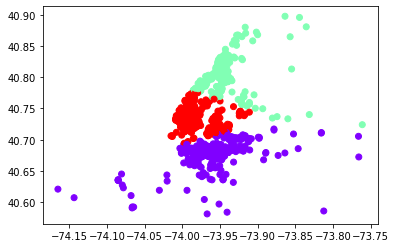

In [7]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')